## Import Packages

In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

## Load the Dataset

In [ ]:
df = pd.read_csv("/content/sample_data/ContinuousCover_Kenya_Results.csv")

**Inspect the structure of the dataset**


*   How many rows and columns are there?
*  What are the data types of each column?



In [ ]:
#shape of the dataframe
df.shape

(3627, 42)

In [ ]:
#Check the Data Type of the Dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review             3627 non-null   object 
 1   paper_id           3627 non-null   int64  
 2   duration           3627 non-null   object 
 3   rv_year            3627 non-null   object 
 4   loc_multi_results  3627 non-null   object 
 5   group_level1       3627 non-null   object 
 6   group_level2       3627 non-null   object 
 7   group_level3       3627 non-null   object 
 8   rv                 3627 non-null   object 
 9   rv_depth           1482 non-null   object 
 10  sample_depth       1356 non-null   object 
 11  rv_units           3627 non-null   object 
 12  stat_test          1988 non-null   object 
 13  stat_type          3627 non-null   object 
 14  trt1               3627 non-null   int64  
 15  trt1_int           460 non-null    float64
 16  trt1_int2          192 n

In [ ]:
# first two rows in the dataframe
df.head(2)

,review,paper_id,duration,rv_year,loc_multi_results,group_level1,group_level2,group_level3,rv,rv_depth,sample_depth,rv_units,stat_test,stat_type,trt1,trt1_int,trt1_int2,trt1_value,trt2,trt2_int,trt2_int2,trt2_value,significance,trt1_name,trt1_details,trt2_name,trt2_details,trt2_group1,trt2_group2,crop_type,system_group1,system_group2,mgmt_intention,norm_interp2,norm_interp3,group_level1_alt,group_level2_alt,norm_interp2_alt,norm_interp3_alt,per_change,grouping,normative_effect
0,Continuous cover,4000,2018-1,1,1,Pests,Nematodes,Nematode Community,"fungivores (Aphelenchoides) at planting, inter...",0-25 cm,0-30 cm,#/250 g soil,ANOVA,mean,0,NaN,NaN,57.20,1.00,NaN,NaN,91.70,NaN,monocrop,sweet potato,intercrop,sweet potato;maize,2,Non-Legume,Vegetable,Uniform,Rainfed,Pest Management,Dependent on other factors,assumed societal benefit,Other Soil Properties,Biotic Factors,Dependent on other factors,assumed societal benefit,60.31,Pests | Nematodes | Nematode Community ; Other...,Dependent on other factors | assumed societal ...
1,Continuous cover,4000,2018-1,1,1,Pests,Nematodes,Nematode Community,"fungivores (Aphelenchuss) at planting, interme...",0-25 cm,0-30 cm,#/250 g soil,ANOVA,mean,0,NaN,NaN,143.00,1.00,NaN,NaN,126.10,NaN,monocrop,sweet potato,intercrop,sweet potato;maize,2,Non-Legume,Vegetable,Uniform,Rainfed,Pest Management,Dependent on other factors,assumed societal benefit,Other Soil Properties,Biotic Factors,Dependent on other factors,assumed societal benefit,-11.82,Pests | Nematodes | Nematode Community ; Other...,Dependent on other factors | assumed societal ...


In [ ]:
#columns in the dataframe
df.columns.to_list()

['review',
 'paper_id',
 'duration',
 'rv_year',
 'loc_multi_results',
 'group_level1',
 'group_level2',
 'group_level3',
 'rv',
 'rv_depth',
 'sample_depth',
 'rv_units',
 'stat_test',
 'stat_type',
 'trt1',
 'trt1_int',
 'trt1_int2',
 'trt1_value',
 'trt2',
 'trt2_int',
 'trt2_int2',
 'trt2_value',
 'significance',
 'trt1_name',
 'trt1_details',
 'trt2_name',
 'trt2_details',
 'trt2_group1',
 'trt2_group2',
 'crop_type',
 'system_group1',
 'system_group2',
 'mgmt_intention',
 'norm_interp2',
 'norm_interp3',
 'group_level1_alt',
 'group_level2_alt',
 'norm_interp2_alt',
 'norm_interp3_alt',
 'per_change',
 'grouping',
 'normative_effect']

**Data Cleaning & Preparation**


*   Check and Handle the Missing Data
*   Check for Duplicates
*   Check Outliers






1. **Missing Data**

```
# This is formatted as code
```



In [99]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 42 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
trt1_int2,3435,94.70
trt2_int2,3435,94.70
trt1_int,3167,87.30
trt2_int,2987,82.40
group_level1_alt,2651,73.10
group_level2_alt,2651,73.10
norm_interp2_alt,2651,73.10
norm_interp3_alt,2651,73.10
sample_depth,2271,62.60
rv_depth,2145,59.10


2. **Duplicates**

In [ ]:
df.duplicated().value_counts()

False    3627
Name: count, dtype: int64

In [ ]:
## Unique Values Percentage
for uni_cols in df:
    u_length = len(pd.unique(df[uni_cols]))
    p_of_total = u_length / len(df)
    perc_format = "{:.0%}". format(p_of_total)
    print(f"{uni_cols} has {perc_format}")

review has 0%
paper_id has 1%
duration has 1%
rv_year has 0%
loc_multi_results has 1%
group_level1 has 0%
group_level2 has 1%
group_level3 has 2%
rv has 22%
rv_depth has 1%
sample_depth has 0%
rv_units has 3%
stat_test has 0%
stat_type has 0%
trt1 has 0%
trt1_int has 0%
trt1_int2 has 0%
trt1_value has 39%
trt2 has 1%
trt2_int has 0%
trt2_int2 has 0%
trt2_value has 43%
significance has 1%
trt1_name has 0%
trt1_details has 1%
trt2_name has 0%
trt2_details has 2%
trt2_group1 has 0%
trt2_group2 has 0%
crop_type has 0%
system_group1 has 0%
system_group2 has 0%
mgmt_intention has 0%
norm_interp2 has 0%
norm_interp3 has 0%
group_level1_alt has 0%
group_level2_alt has 0%
norm_interp2_alt has 0%
norm_interp3_alt has 0%
per_change has 78%
grouping has 3%
normative_effect has 0%


In [100]:
# Define the threshold for unique values percentage
threshold = 20
unique_values_percentage = {
    'review': 0,
    'paper_id': 1,
    'duration': 1,
    'rv_year': 0,
    'loc_multi_results': 1,
    'group_level1': 0,
    'group_level2': 1,
    'group_level3': 2,
    'rv': 22,
    'rv_depth': 1,
    'sample_depth': 0,
    'rv_units': 3,
    'stat_test': 0,
    'stat_type': 0,
    'trt1': 0,
    'trt1_int': 0,
    'trt1_int2': 0,
    'trt1_value': 39,
    'trt2': 1,
    'trt2_int': 0,
    'trt2_int2': 0,
    'trt2_value': 43,
    'significance': 1,
    'trt1_name': 0,
    'trt1_details': 1,
    'trt2_name': 0,
    'trt2_details': 2,
    'trt2_group1': 0,
    'trt2_group2': 0,
    'crop_type': 0,
    'system_group1': 0,
    'system_group2': 0,
    'mgmt_intention': 0,
    'norm_interp2': 0,
    'norm_interp3': 0,
    'group_level1_alt': 0,
    'group_level2_alt': 0,
    'norm_interp2_alt': 0,
    'norm_interp3_alt': 0,
    'per_change': 78,
    'grouping': 3,
    'normative_effect': 0
}

# Drop columns with more than the threshold percentage of unique values
columns_to_drop = [col for col, perc in unique_values_percentage.items() if perc > threshold]

df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.dtypes

review                object
paper_id               int64
duration              object
rv_year               object
loc_multi_results     object
group_level1          object
group_level2          object
group_level3          object
rv_depth              object
sample_depth          object
rv_units              object
stat_test             object
stat_type             object
trt1                   int64
trt1_int             float64
trt1_int2            float64
trt2                 float64
trt2_int             float64
trt2_int2            float64
significance          object
trt1_name             object
trt1_details          object
trt2_name             object
trt2_details          object
trt2_group1            int64
trt2_group2           object
crop_type             object
system_group1         object
system_group2         object
mgmt_intention        object
norm_interp2          object
norm_interp3          object
group_level1_alt      object
group_level2_alt      object
norm_interp2_a

3. **Outliers**

Outliers are data points that deviate markedly from the overall pattern of the dataset.

In [101]:
outlier_investigation = df.describe()
outlier_investigation

,paper_id,trt1,trt1_int,trt1_int2,trt1_value,trt2,trt2_int,trt2_int2,trt2_value,trt2_group1,per_change
count,3627.00,3627.00,460.00,192.00,3627.00,3621.00,640.00,192.00,3627.00,3627.00,3584.00
mean,4021.23,0.65,3.93,5.90,310.31,2.79,3.95,5.91,317.59,2.12,inf
std,11.69,2.31,0.90,0.70,1361.09,2.09,0.86,0.69,1430.47,0.53,NaN
min,4000.00,0.00,1.00,5.00,-271.72,1.00,2.00,5.00,-161.38,1.00,-440.00
25%,4012.00,0.00,3.00,5.00,3.12,1.00,3.00,5.00,3.23,2.00,-24.43
50%,4022.00,0.00,4.00,6.00,21.00,2.00,4.00,6.00,18.20,2.00,-2.00
75%,4028.00,1.00,4.00,6.00,133.70,4.00,4.00,6.00,108.56,2.00,27.09
max,4046.00,31.00,7.00,7.00,28920.00,19.00,7.00,7.00,27094.00,4.00,inf


In [ ]:
outlier_columns = df.select_dtypes(exclude="object").columns
## Verify and drop outliers
for column in outlier_columns:
    lower_quartile = df[column].quantile(0.25)
    upper_quartile = df[column].quantile(0.75) # Fixed indentation
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended

    # Correct the comparison to use max_border
    outliers = df[(df[column] < min_border) | (df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")

    # df_final.drop(outliers, inplace = True) # Uncomment to drop outliers if needed

0 outliers detected in column paper_id
34 outliers detected in column trt1
8 outliers detected in column trt1_int
0 outliers detected in column trt1_int2
519 outliers detected in column trt1_value
66 outliers detected in column trt2
8 outliers detected in column trt2_int
0 outliers detected in column trt2_int2
556 outliers detected in column trt2_value
932 outliers detected in column trt2_group1
350 outliers detected in column per_change


### **Data Visualisation**

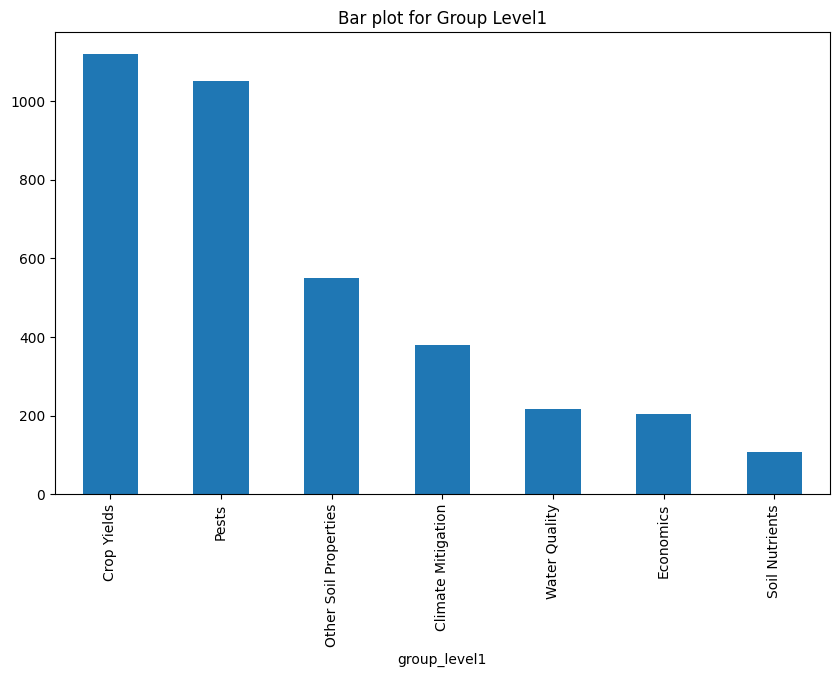

In [ ]:
plt.figure(figsize = (10, 6))
df['group_level1'].value_counts().plot(kind='bar')
plt.title("Bar plot for Group Level1")
plt.show()

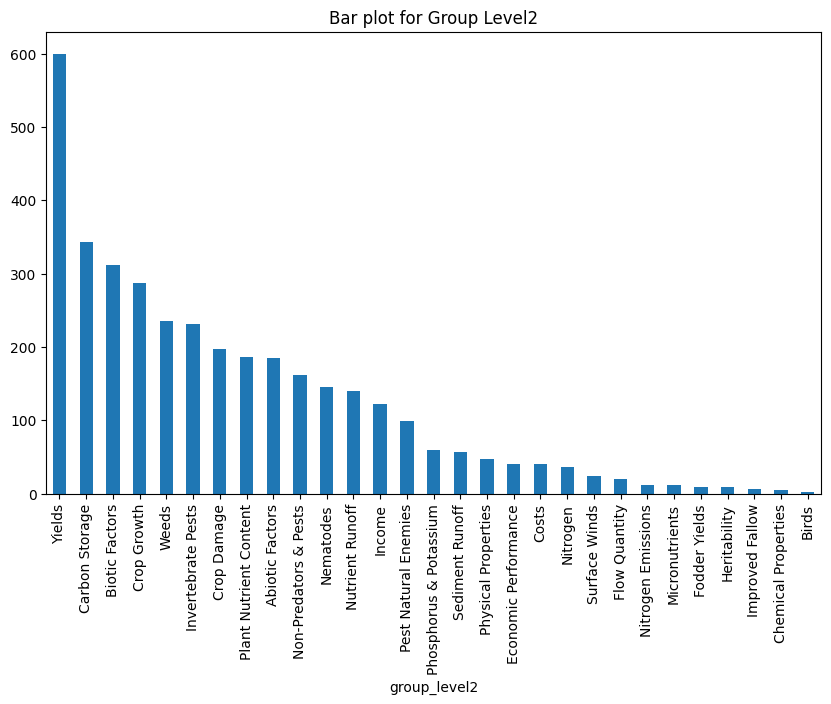

In [ ]:
plt.figure(figsize = (10, 6))
df['group_level2'].value_counts().plot(kind='bar')
plt.title("Bar plot for Group Level2")
plt.show()

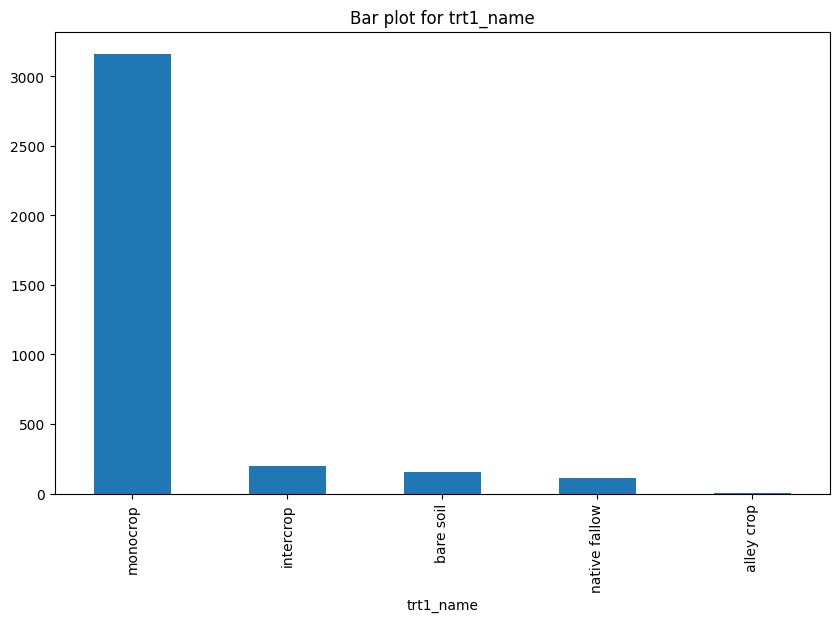

In [102]:
plt.figure(figsize = (10, 6))
df['trt1_name'].value_counts().plot(kind='bar')
plt.title("Bar plot for trt1_name")
plt.show()

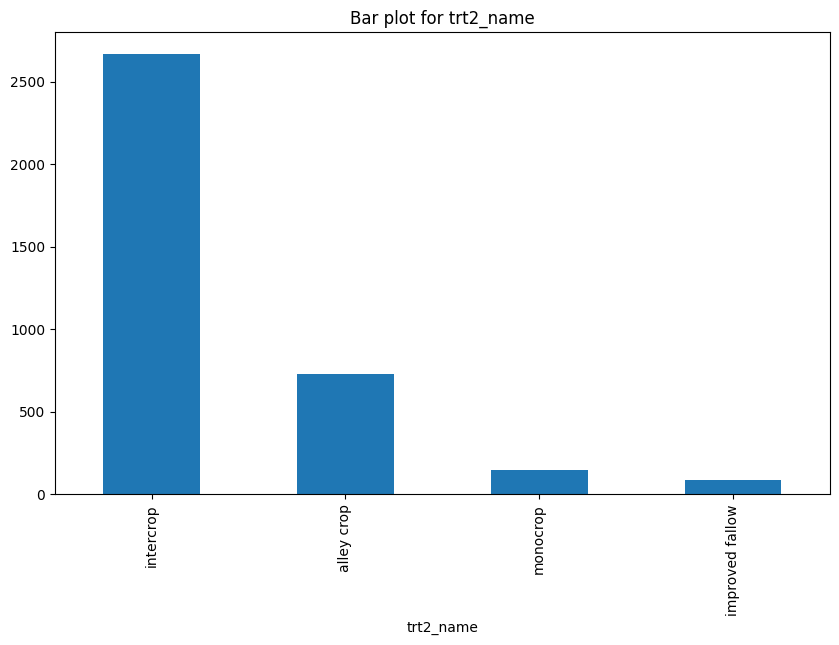

In [ ]:
plt.figure(figsize = (10, 6))
df['trt2_name'].value_counts().plot(kind='bar')
plt.title("Bar plot for trt2_name")
plt.show()

### 1.	Analyze the crop yield impacts of intercropping compared to monocropping. Provide visualizations of your results. To access the crop yield data, you will need to filter the dataset by group_level1 = Crop Yields && group_level2 = Yields. To further narrow to intercropping and monocropping, you will need to filter the data so trt1_name = monocrop && trt2_name=intercrop.

In [ ]:
# Filter data for crop yields analysis
crop_yields_data = df[
    (df['group_level1'] == 'Crop Yields') &
    (df['group_level2'] == 'Yields') &
    (df['trt1_name'] == 'monocrop') &
    (df['trt2_name'] == 'intercrop')
]

# Display the first few rows of the filtered crop yields data
crop_yields_data.head(3)

,review,paper_id,duration,rv_year,loc_multi_results,group_level1,group_level2,group_level3,rv,rv_depth,sample_depth,rv_units,stat_test,stat_type,trt1,trt1_int,trt1_int2,trt1_value,trt2,trt2_int,trt2_int2,trt2_value,significance,trt1_name,trt1_details,trt2_name,trt2_details,trt2_group1,trt2_group2,crop_type,system_group1,system_group2,mgmt_intention,norm_interp2,norm_interp3,group_level1_alt,group_level2_alt,norm_interp2_alt,norm_interp3_alt,per_change,grouping,normative_effect
469,Continuous cover,4003,1981-2,1,1,Crop Yields,Yields,Sorghum,"number of pods per plant, major cropping season",NaN,NaN,pods/plant,NaN,mean,0,NaN,NaN,24.70,3.00,NaN,NaN,23.90,NaN,monocrop,cowpea,intercrop,maize;cowpea,2,Legume & Non-Legume,Bean,Uniform,Rainfed,Pest Management,Positive,assumed societal benefit,NaN,NaN,NaN,NaN,-3.24,Crop Yields | Yields | Sorghum,Positive | assumed societal benefit
470,Continuous cover,4003,1981-2,1,1,Crop Yields,Yields,Sorghum,"number of pods per plant, major cropping season",NaN,NaN,pods/plant,NaN,mean,0,NaN,NaN,24.70,4.00,NaN,NaN,26.30,NaN,monocrop,cowpea,intercrop,sorghum;cowpea,2,Legume & Non-Legume,Bean,Uniform,Rainfed,Pest Management,Positive,assumed societal benefit,NaN,NaN,NaN,NaN,6.48,Crop Yields | Yields | Sorghum,Positive | assumed societal benefit
471,Continuous cover,4003,1981-2,1,1,Crop Yields,Yields,Sorghum,"number of pods per plant, intercrop planted in...",NaN,NaN,pods/plant,NaN,mean,0,NaN,NaN,24.70,6.00,NaN,NaN,26.70,NaN,monocrop,cowpea,intercrop,sorghum;maize;cowpea,3,Legume & Non-Legume,Bean,Uniform,Rainfed,Pest Management,Positive,assumed societal benefit,NaN,NaN,NaN,NaN,8.10,Crop Yields | Yields | Sorghum,Positive | assumed societal benefit


In [ ]:
print(crop_yields_data.shape)

(252, 42)


In [ ]:
crop_yields_data['trt1_name'].value_counts()

trt1_name
monocrop    252
Name: count, dtype: int64

In [ ]:
crop_yields_data['trt2_name'].value_counts()

trt2_name
intercrop    252
Name: count, dtype: int64

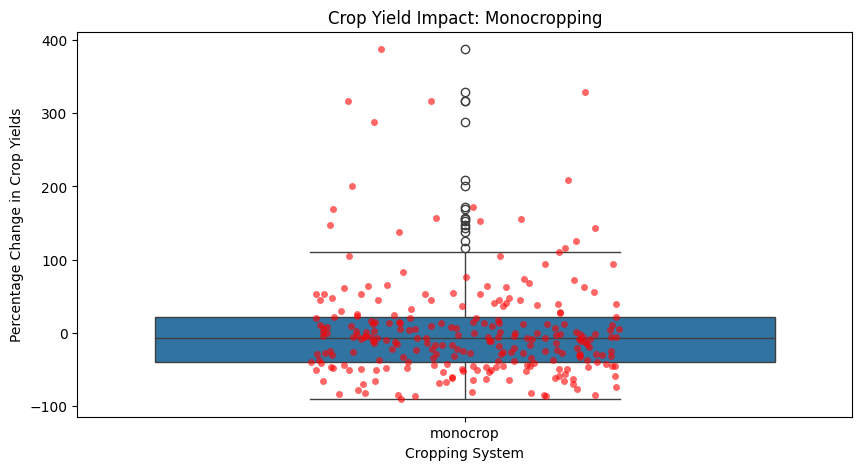

In [ ]:
# Create a boxplot for the percentage change in crop yields
plt.figure(figsize=(10, 5))
sns.boxplot(data=crop_yields_data, x='trt1_name', y='per_change')
sns.stripplot(data=crop_yields_data, x='trt1_name', y='per_change', color='red', jitter=0.2, size=5, alpha=0.6)
plt.title('Crop Yield Impact: Monocropping')
plt.xlabel('Cropping System')
plt.ylabel('Percentage Change in Crop Yields')
plt.show()

    * Consistency: Monocropping yields tend to be relatively consistent, with most changes hovering around zero, indicating little to no impact on yields on average.
    * Potential for High Yields: The presence of outliers shows that monocropping can occasionally lead to very high yield increases, though this is not common.
    * Risk of Yield Losses: The spread of points below zero also indicates that monocropping can sometimes lead to yield reductions, though these are generally within a smaller range compared to the positive outliers.

- This analysis highlights the general stability of monocropping yields with occasional potential for significant yield changes, both positive and negative. For a more comprehensive understanding, a comparison with intercropping systems is necessary to see how they perform relative to monocropping.

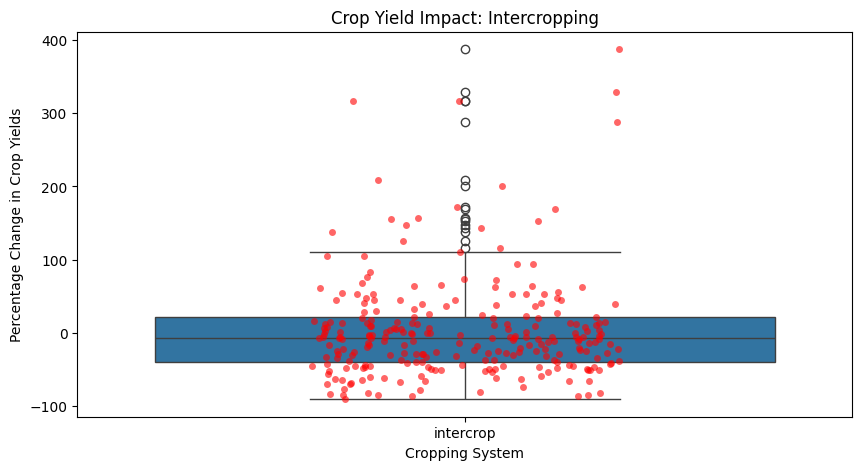

In [103]:
# Create a boxplot for the percentage change in crop yields
plt.figure(figsize=(10, 5))
sns.boxplot(data=crop_yields_data, x='trt2_name', y='per_change')
sns.stripplot(data=crop_yields_data, x='trt2_name', y='per_change', color='red', jitter=0.2, size=5, alpha=0.6)
plt.title('Crop Yield Impact: Intercropping')
plt.xlabel('Cropping System')
plt.ylabel('Percentage Change in Crop Yields')
plt.show()

    * Increased Variability: Intercropping yields tend to be more variable compared to monocropping, as shown by the wider IQR. This suggests that intercropping can result in a broader range of yield changes.
    * Potential for High Yields: The presence of outliers with very high positive percentage changes indicates that intercropping has the potential to significantly boost yields under optimal conditions.
    * Risk of Yield Losses: The presence of negative outliers also indicates that intercropping can lead to significant yield reductions in some cases.

**Comparative Analysis**

**Is there a significant difference in yields between monocropping and intercropping?**

*  Carry out a 2-sample t-test  to compare the means of two independent groups (monocropping and intercropping) when the data is normally distributed.

*  Check if both samples are approximately normally distributed using Shapiro-Wilk test/QQ Plot.

* Use Levene's test for equality of variances between the two groups.







In [108]:
crop_yields_data['trt1_value']

469       24.70
470       24.70
471       24.70
472       24.70
473       18.10
474       18.10
475       18.10
476       18.10
477        1.00
478        1.00
479        1.00
480        1.00
481        1.00
482        1.00
483        1.00
484        1.00
485        1.00
486        1.00
487        1.00
488        1.00
747        1.80
759       74.67
760       93.33
761       95.67
762      132.33
763      268.33
764      304.67
767      202.33
768      169.33
769        4.10
770        4.60
771        1.00
772        1.00
979     2708.00
980     1016.00
982     2128.00
983      566.00
985      667.00
986      101.00
988     1230.00
989      468.00
991     1763.00
1165       3.40
1166       3.40
1167       3.40
1379    4500.00
1381    4500.00
1382    4500.00
1383    4500.00
1384    4500.00
1406    5250.00
1408    5250.00
1409    5250.00
1410    5250.00
1411    5250.00
2536    3140.00
2537    3140.00
2542    2847.00
2543    2847.00
2564       1.32
2565       1.32
2566       1.32
2567    

In [111]:
from scipy.stats import ttest_ind, levene

# Assuming 'trt1_name' and 'trt2_name' identify monocrop and intercrop systems
monocrop = crop_yields_data[crop_yields_data['trt1_name'] == 'Monocropping']  # Replace 'Monocropping' with the actual name
intercrop = crop_yields_data[crop_yields_data['trt2_name'] == 'Intercropping']  # Replace 'Intercropping' with the actual name
# Levene's test for equality of variances
stat, p = levene(crop_yields_data['trt1_value'], crop_yields_data['trt2_value'])
print('Levene’s test: p-value =', p)
# Two-sample t-test
t_stat, p_value = ttest_ind(crop_yields_data['trt1_value'], crop_yields_data['trt2_value'], equal_var=True)
print('Two-sample t-test: t-statistic =', t_stat, 'p-value =', p_value)

Levene’s test: p-value = 0.7964842282404322
Two-sample t-test: t-statistic = 0.2573706443442382 p-value = 0.7969981233411645


**The p-value of 0.7965 exceeds the significance level of 0.05, indicating no statistically significant difference in mean crop yields between intercropping and monocropping. The Levene test also shows that variances between the two groups are equal, further supporting these findings. Therefore, both yield means and variances do not significantly differ between the two farming methods in the dataset analyzed.**

**Conclusion:**

**Statistical Analysis:** The comparison of crop yields between intercropping and monocropping methods yielded a non-significant p-value of 0.7965 (α = 0.05). This suggests that there is no statistically significant difference in mean crop yields between the two methods.

**Visual Analysis:** Visual examination of the data indicates that intercropping tends to result in more variable outcomes compared to monocropping. This variability suggests potential for both higher yields and higher risks under different conditions.

**Conclusion:** Based on both statistical and visual analyses, it is concluded that while intercropping does not show a statistically significant advantage in mean crop yields over monocropping, its potential benefits, such as increased yield variability, should be weighed against higher management complexity and associated risks. Effective implementation of intercropping may require tailored management strategies to optimize outcomes under varying agricultural conditions

### 2.	Analyze the carbon storage impacts of intercropping compared to monocropping. Provide visualization of your results. To access the soil carbon storage data, you will need to filter the dataset by group_level1= Climate Mitigation && group_level2 = Carbon Storage.  To further narrow to intercropping and monocropping, you will need to filter the data so trt1_name = monocrop && trt2_name=intercrop.

In [ ]:
# Filter data for carbon storage analysis
carbon_storage_data = df[
    (df['group_level1'] == 'Climate Mitigation') &
    (df['group_level2'] == 'Carbon Storage') &
    (df['trt1_name'] == 'monocrop') &
    (df['trt2_name'] == 'intercrop')
]

In [ ]:
# Display the first few rows of the filtered carbon storage data
carbon_storage_data.head(3)

,review,paper_id,duration,rv_year,loc_multi_results,group_level1,group_level2,group_level3,rv,rv_depth,sample_depth,rv_units,stat_test,stat_type,trt1,trt1_int,trt1_int2,trt1_value,trt2,trt2_int,trt2_int2,trt2_value,significance,trt1_name,trt1_details,trt2_name,trt2_details,trt2_group1,trt2_group2,crop_type,system_group1,system_group2,mgmt_intention,norm_interp2,norm_interp3,group_level1_alt,group_level2_alt,norm_interp2_alt,norm_interp3_alt,per_change,grouping,normative_effect
1007,Continuous cover,4016,1992-1,1,1,Climate Mitigation,Carbon Storage,Loss Of Soil Organic Carbon,loss of total carbon due to erosion,NaN,NaN,kg/ha,NaN,mean,1,NaN,NaN,184.00,3.00,NaN,NaN,53.00,ns,monocrop,maize,intercrop,bean;maize,2,Legume & Non-Legume,Cereal,Uniform,Rainfed,Nutrient Management;Soil Health,Positive,assumed societal harm,Other Soil Properties,Chemical Properties,Dependent on other factors,assumed societal harm,-71.20,Climate Mitigation | Carbon Storage | Loss Of ...,Positive | assumed societal harm ; Dependent o...
1008,Continuous cover,4016,1992-1,1,1,Climate Mitigation,Carbon Storage,Loss Of Soil Organic Carbon,loss of total carbon due to erosion,NaN,NaN,kg/ha,NaN,mean,2,NaN,NaN,101.00,3.00,NaN,NaN,53.00,ns,monocrop,bean,intercrop,bean;maize,2,Legume & Non-Legume,Bean,Uniform,Rainfed,Nutrient Management;Soil Health,Positive,assumed societal harm,Other Soil Properties,Chemical Properties,Dependent on other factors,assumed societal harm,-47.52,Climate Mitigation | Carbon Storage | Loss Of ...,Positive | assumed societal harm ; Dependent o...
1009,Continuous cover,4016,1992-1,1,1,Climate Mitigation,Carbon Storage,Soil Organic Carbon,total carbon concentration in eroded soil,0-5 cm,0-30 cm,g/kg,NaN,mean,1,NaN,NaN,29.20,3.00,NaN,NaN,28.60,NaN,monocrop,maize,intercrop,bean;maize,2,Legume & Non-Legume,Cereal,Uniform,Rainfed,Nutrient Management;Soil Health,Positive,assumed societal benefit,Other Soil Properties,Chemical Properties,Dependent on other factors,assumed societal benefit,-2.05,Climate Mitigation | Carbon Storage | Soil Org...,Positive | assumed societal benefit ; Dependen...


In [ ]:
carbon_storage_data.shape

(312, 42)

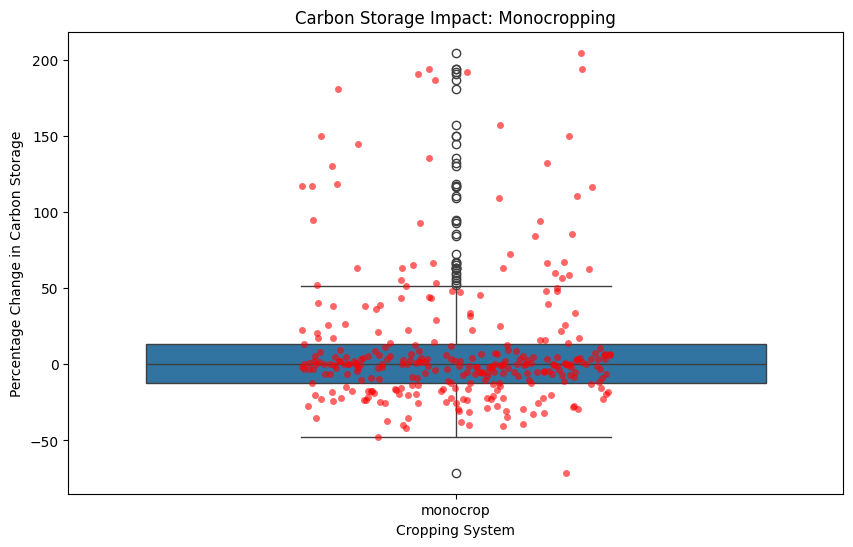

In [ ]:
# Create a boxplot for the percentage change in carbon storage for monocrop systems
plt.figure(figsize=(10, 6))
sns.boxplot(data=carbon_storage_data, x='trt1_name', y='per_change')
sns.stripplot(data=carbon_storage_data, x='trt1_name', y='per_change', color='red', jitter=0.2, size=5, alpha=0.6)
plt.title('Carbon Storage Impact: Monocropping')
plt.xlabel('Cropping System')
plt.ylabel('Percentage Change in Carbon Storage')
plt.show()

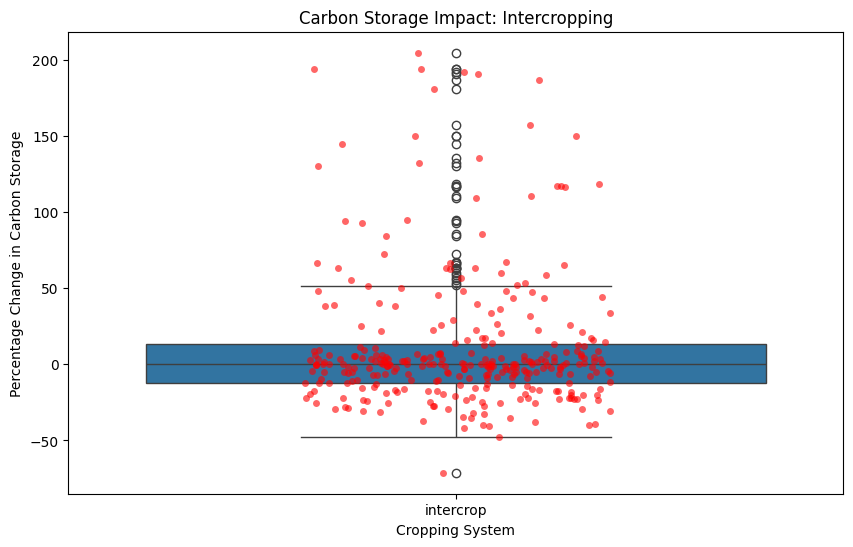

In [ ]:
# Create a boxplot for the percentage change in carbon storage for intercrop systems
plt.figure(figsize=(10, 6))
sns.boxplot(data=carbon_storage_data, x='trt2_name', y='per_change')
sns.stripplot(data=carbon_storage_data, x='trt2_name', y='per_change', color='red', jitter=0.2, size=5, alpha=0.6)
plt.title('Carbon Storage Impact: Intercropping')
plt.xlabel('Cropping System')
plt.ylabel('Percentage Change in Carbon Storage')
plt.show()